Import Libraries

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import os
import math
import matplotlib.image as mpimg

Explain what Mediapipe is and how to generate landmarks

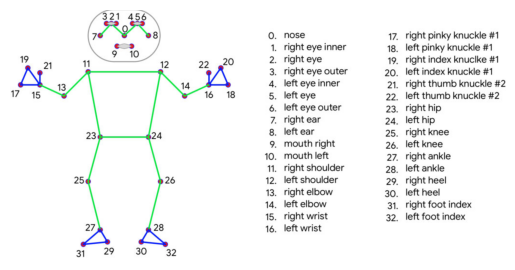

NOSE
LEFT_EYE_INNER
LEFT_EYE
LEFT_EYE_OUTER
RIGHT_EYE_INNER
RIGHT_EYE
RIGHT_EYE_OUTER
LEFT_EAR
RIGHT_EAR
MOUTH_LEFT
MOUTH_RIGHT
LEFT_SHOULDER
RIGHT_SHOULDER
LEFT_ELBOW
RIGHT_ELBOW
LEFT_WRIST
RIGHT_WRIST
LEFT_PINKY
RIGHT_PINKY
LEFT_INDEX
RIGHT_INDEX
LEFT_THUMB
RIGHT_THUMB
LEFT_HIP
RIGHT_HIP
LEFT_KNEE
RIGHT_KNEE
LEFT_ANKLE
RIGHT_ANKLE
LEFT_HEEL
RIGHT_HEEL
LEFT_FOOT_INDEX
RIGHT_FOOT_INDEX


In [2]:
#Mediapipe assists developers in handling images and videos by offering user-friendly tools for tasks such as hand tracking, face detection, and body pose estimation.

# Load the image from file
Landmarks_img= mpimg.imread('D:\DESKTOP\DSGP -Main\DSGP-Group28\Pullup_DEMINI(GIT)\Mediapipe_Landmarks.jpg')  # Replace 'path_to_your_image.jpg' with the actual file path

# Display the image
plt.imshow(Landmarks_img)
plt.axis('off')  # Hide axis
plt.show()

# Accessing all PoseLandmark points
all_pose_landmarks = list(mp.solutions.pose.PoseLandmark)

# Displaying landmark names
for landmark in all_pose_landmarks:
    print(landmark.name)

Pose estimation pipeline using MediaPipe

In [3]:
# Setting up the Pose and Drawing Utilities modules
pose_module = mp.solutions.pose
drawing_utils_module = mp.solutions.drawing_utils

# Configuring the Pose object with specific settings
pose = pose_module.Pose(min_detection_confidence=0.6,
                        min_tracking_confidence=0.6,
                        static_image_mode=False,
                        smooth_landmarks=True,
                        model_complexity=2)

# Defining the desired width and height
desired_width = 480
desired_height = 360

Calculate Angles

In [4]:
def calculate_angle(row):
    import math
    row = abs(row)

    # Retrieving columns using their index positions (0 to 5) from the row.
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    return angle

Fill the keypoints dictionary and handle frame processing

In [5]:
#Fill the keypoints dictionary


def processVideo(VideoFile, positive=True):
    cap = cv2.VideoCapture(VideoFile)
    
    Data_Dict = {}
    
    for landmark in pose_module.PoseLandmark:
        x_list_name = f"{landmark.name}_Point_x"
        y_list_name = f"{landmark.name}_Point_y"
        z_list_name = f"{landmark.name}_Point_z"
        visibility_list_name = f"{landmark.name}_visibility"
    
        Data_Dict[x_list_name] = []
        Data_Dict[y_list_name] = []
        Data_Dict[z_list_name] = []
        Data_Dict[visibility_list_name] = []

#frame processing
    
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:

            for landmark in pose_module.PoseLandmark:
                x_list_name = f"{landmark.name}_Point_x"
                y_list_name = f"{landmark.name}_Point_y"
                z_list_name = f"{landmark.name}_Point_z"
                visibility_list_name = f"{landmark.name}_visibility"

                Data_Dict[x_list_name].append(results.pose_landmarks.landmark[landmark].x)
                Data_Dict[y_list_name].append(results.pose_landmarks.landmark[landmark].y)
                Data_Dict[z_list_name].append(results.pose_landmarks.landmark[landmark].z)
                Data_Dict[visibility_list_name].append(results.pose_landmarks.landmark[landmark].visibility)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    df = pd.DataFrame(Data_Dict)
    Angles_df = pd.DataFrame()

####################Angles
 ##########################################SHOULDER

    # LEFT_SHOULDER
    left_shoulder = df[[
        'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
        'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
        'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y'
    ]]
    Angles_df['Left_Shoulder_Angle'] = left_shoulder.apply(calculate_angle, axis=1)

    # RIGHT_SHOULDER
    right_shoulder = df[[
        'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
        'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
        'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y'
    ]]
    Angles_df['Right_Shoulder_Angle'] = right_shoulder.apply(calculate_angle, axis=1)

    ###########################################ELBOW

    # LEFT_ELBOW
    left_elbow = df[[
        'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
        'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
        'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y'
    ]]
    Angles_df['Left_Elbow_Angle'] = left_elbow.apply(calculate_angle, axis=1)

    # RIGHT_ELBOW
    right_elbow = df[[
        'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
        'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
        'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
    ]]
    Angles_df['Right_Elbow_Angle'] = right_elbow.apply(calculate_angle, axis=1)

    #############################################WRIST

    # LEFT_WRIST
    left_wrist = df[[
        'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
        'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
        'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y'
    ]]
    Angles_df['Left_Wrist_Angle'] = left_wrist.apply(calculate_angle, axis=1)

    # RIGHT_WRIST
    right_wrist = df[[
        'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
        'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
        'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
    ]]
    Angles_df['Right_Wrist_Angle'] = right_wrist.apply(calculate_angle, axis=1)

    ##############################################HIP

    # LEFT_HIP
    left_hip = df[[
        'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
        'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
        'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y'
    ]]
    Angles_df['Left_Hip_Angle'] = left_hip.apply(calculate_angle, axis=1)

    # RIGHT_HIP
    right_hip = df[[
        'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
        'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
        'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y'
    ]]
    Angles_df['Right_Hip_Angle'] = right_hip.apply(calculate_angle, axis=1)

    ##############################################KNEE

    # LEFT_KNEE
    left_knee =df[[
        'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
        'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
        'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y'
    ]]
    Angles_df['Left_Knee_Angle'] = left_knee.apply(calculate_angle, axis=1)

#RIGHT_KNEE

    Right_Knee = df[[
        'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
        'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
        'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y'
    ]]
    Angles_df['Right_Knee_Angle'] = Right_Knee.apply(calculate_angle, axis=1)


###################################################NECK
    Neck = df[[
        'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
        'NOSE_Point_x', 'NOSE_Point_y',
        'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
    ]]
    Angles_df['Neck_Angle'] = Neck.apply(calculate_angle, axis=1) 

    

###############################################ANKLE

#LEFT_ANKLE
    Left_Ankle = df[[
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y'
    ]]
    Angles_df['Left_Ankle_Angle'] = Left_Ankle.apply(calculate_angle, axis=1)



#RIGHT_ANKLE

    Right_Ankle = df[[
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y'
    ]]
    Angles_df['Right_Ankle_Angle'] = Right_Ankle.apply(calculate_angle, axis=1)



################################################HEEL

#LEFT_HEEL


    Left_Heel = df[[
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y',
    'LEFT_FOOT_INDEX_Point_x', 'LEFT_FOOT_INDEX_Point_y'
   ]]
    Angles_df['Left_Heel_Angle'] = Left_Heel.apply(calculate_angle, axis=1)


#RIGHT_HEEL

    Right_Heel = df[[
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y',
    'RIGHT_FOOT_INDEX_Point_x', 'RIGHT_FOOT_INDEX_Point_y'
    ]]
    Angles_df['Right_Heel_Angle'] = Right_Heel.apply(calculate_angle, axis=1)


################################################FOOT_INDEX

#LEFT_FOOT_INDEX

    Left_Foot_Index = df[[
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y',
    'LEFT_FOOT_INDEX_Point_x', 'LEFT_FOOT_INDEX_Point_y',
    'LEFT_HEEL_Point_x', 'LEFT_HEEL_Point_y'
     ]]
    Angles_df['Left_Foot_Index_Angle'] =Left_Foot_Index.apply(calculate_angle, axis=1)


#RIGHT_FOOT_INDEX
    Right_Foot_Index = df[[
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y',
    'RIGHT_FOOT_INDEX_Point_x', 'RIGHT_FOOT_INDEX_Point_y',
    'RIGHT_HEEL_Point_x', 'RIGHT_HEEL_Point_y'
    ]]
    Angles_df['Right_Foot_Index_Angle'] = Right_Foot_Index.apply(calculate_angle, axis=1)







    label = 1 if positive else 0

    return Angles_df.assign(Label=label)

Data saved to Datasets

In [6]:
# Initialize an empty DataFrame for the dataset
Result_Dataset = pd.DataFrame()

# Get the list of video files from the 'Videos' directory
Video_Files = os.listdir('Videos')

# Iterate over each video file
for video_file in Video_Files:
    # Determine the label based on the video file name
    label = False if video_file.startswith('W') else True
    print(f'File in process : {video_file}')
    
    # Call the processVideo function to extract angles
    angles_data = processVideo(f'Videos/{video_file}', positive=label)
    
    # Concatenate the extracted angles with the result dataset
    Result_Dataset = pd.concat([Result_Dataset, angles_data], ignore_index=True)
    
    # Print dataset information after each file processing
    print(Result_Dataset.info())

# Save the result dataset to an Excel file
Result_Dataset.to_csv('Datasets/Processed_Dataset.csv', index=False)
print("Data saved to Datasets/Processed_Dataset.csv")

File in process : pullupr1.mp4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Left_Shoulder_Angle     174 non-null    float64
 1   Right_Shoulder_Angle    174 non-null    float64
 2   Left_Elbow_Angle        174 non-null    float64
 3   Right_Elbow_Angle       174 non-null    float64
 4   Left_Wrist_Angle        174 non-null    float64
 5   Right_Wrist_Angle       174 non-null    float64
 6   Left_Hip_Angle          174 non-null    float64
 7   Right_Hip_Angle         174 non-null    float64
 8   Left_Knee_Angle         174 non-null    float64
 9   Right_Knee_Angle        174 non-null    float64
 10  Neck_Angle              174 non-null    float64
 11  Left_Ankle_Angle        174 non-null    float64
 12  Right_Ankle_Angle       174 non-null    float64
 13  Left_Heel_Angle         174 non-null    float64
 14  Right_Heel_

Show the dataset

In [7]:
Data=pd.read_csv("Datasets/Processed_Dataset.csv") 
Data

,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle,Label
0,165.064935,144.155231,149.990305,200.211756,342.612726,11.343208,203.293440,204.922833,198.255846,197.566881,338.831018,212.780507,198.598739,40.542986,29.372834,329.597807,324.993885,1
1,150.938958,145.216671,172.915949,199.710242,357.093265,10.792307,203.366508,202.554539,193.765923,197.151669,339.937679,208.638801,202.257839,38.410095,29.410154,330.032495,329.676333,1
2,147.717456,146.029741,173.162524,199.675097,356.596438,10.772362,203.593613,201.082005,193.017401,198.140141,340.738279,207.385659,202.800026,38.416218,29.410902,331.834458,330.311446,1
3,144.461970,147.036938,178.615315,199.900469,359.269299,10.929321,201.924582,199.235815,194.966243,199.465439,340.400199,205.418158,202.832847,40.427934,29.673842,330.991236,331.390707,1
4,145.550065,149.673631,184.876456,198.641112,2.280300,10.236448,200.465639,197.488957,194.240348,199.808955,340.788118,205.945275,203.062255,42.080589,30.887810,329.983482,334.013917,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,163.704720,209.004217,207.133060,148.744090,13.098054,345.933719,175.074895,180.276267,175.680493,174.874895,82.529833,169.390964,143.548044,207.852793,238.790930,2.947722,6.076734,0
2144,164.550424,205.262441,204.622905,152.920332,12.095715,347.428670,174.960293,180.000502,176.499220,176.104746,74.890849,173.294639,176.235648,201.623680,224.712340,2.316814,26.947943,0
2145,165.280351,203.064845,202.052168,155.677844,10.789510,348.509967,175.451825,179.287789,177.924665,176.621054,72.764794,169.146444,170.651260,233.067934,209.328274,19.609776,7.585464,0
2146,165.800059,200.944038,200.384591,158.593526,10.004783,349.761815,175.278685,178.536181,179.357638,178.513274,76.570715,169.601309,171.557673,208.403491,219.140218,4.418218,17.381127,0


Add Data frames Numbers

In [8]:
# Read the CSV file into a DataFrame
Data_With_Frame = pd.read_csv("Datasets/Processed_Dataset.csv")

# Add a new column named "frame number" with increasing count for each row
Data_With_Frame['frame number'] = Data_With_Frame.index + 1

# Save the DataFrame back to a CSV file
Data_With_Frame.to_csv("Datasets/Processed_Dataset_With_Frames.csv", index=False)
Data_With_Frame

,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle,Label,frame number
0,165.064935,144.155231,149.990305,200.211756,342.612726,11.343208,203.293440,204.922833,198.255846,197.566881,338.831018,212.780507,198.598739,40.542986,29.372834,329.597807,324.993885,1,1
1,150.938958,145.216671,172.915949,199.710242,357.093265,10.792307,203.366508,202.554539,193.765923,197.151669,339.937679,208.638801,202.257839,38.410095,29.410154,330.032495,329.676333,1,2
2,147.717456,146.029741,173.162524,199.675097,356.596438,10.772362,203.593613,201.082005,193.017401,198.140141,340.738279,207.385659,202.800026,38.416218,29.410902,331.834458,330.311446,1,3
3,144.461970,147.036938,178.615315,199.900469,359.269299,10.929321,201.924582,199.235815,194.966243,199.465439,340.400199,205.418158,202.832847,40.427934,29.673842,330.991236,331.390707,1,4
4,145.550065,149.673631,184.876456,198.641112,2.280300,10.236448,200.465639,197.488957,194.240348,199.808955,340.788118,205.945275,203.062255,42.080589,30.887810,329.983482,334.013917,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,163.704720,209.004217,207.133060,148.744090,13.098054,345.933719,175.074895,180.276267,175.680493,174.874895,82.529833,169.390964,143.548044,207.852793,238.790930,2.947722,6.076734,0,2144
2144,164.550424,205.262441,204.622905,152.920332,12.095715,347.428670,174.960293,180.000502,176.499220,176.104746,74.890849,173.294639,176.235648,201.623680,224.712340,2.316814,26.947943,0,2145
2145,165.280351,203.064845,202.052168,155.677844,10.789510,348.509967,175.451825,179.287789,177.924665,176.621054,72.764794,169.146444,170.651260,233.067934,209.328274,19.609776,7.585464,0,2146
2146,165.800059,200.944038,200.384591,158.593526,10.004783,349.761815,175.278685,178.536181,179.357638,178.513274,76.570715,169.601309,171.557673,208.403491,219.140218,4.418218,17.381127,0,2147


How Angles vary over the frames

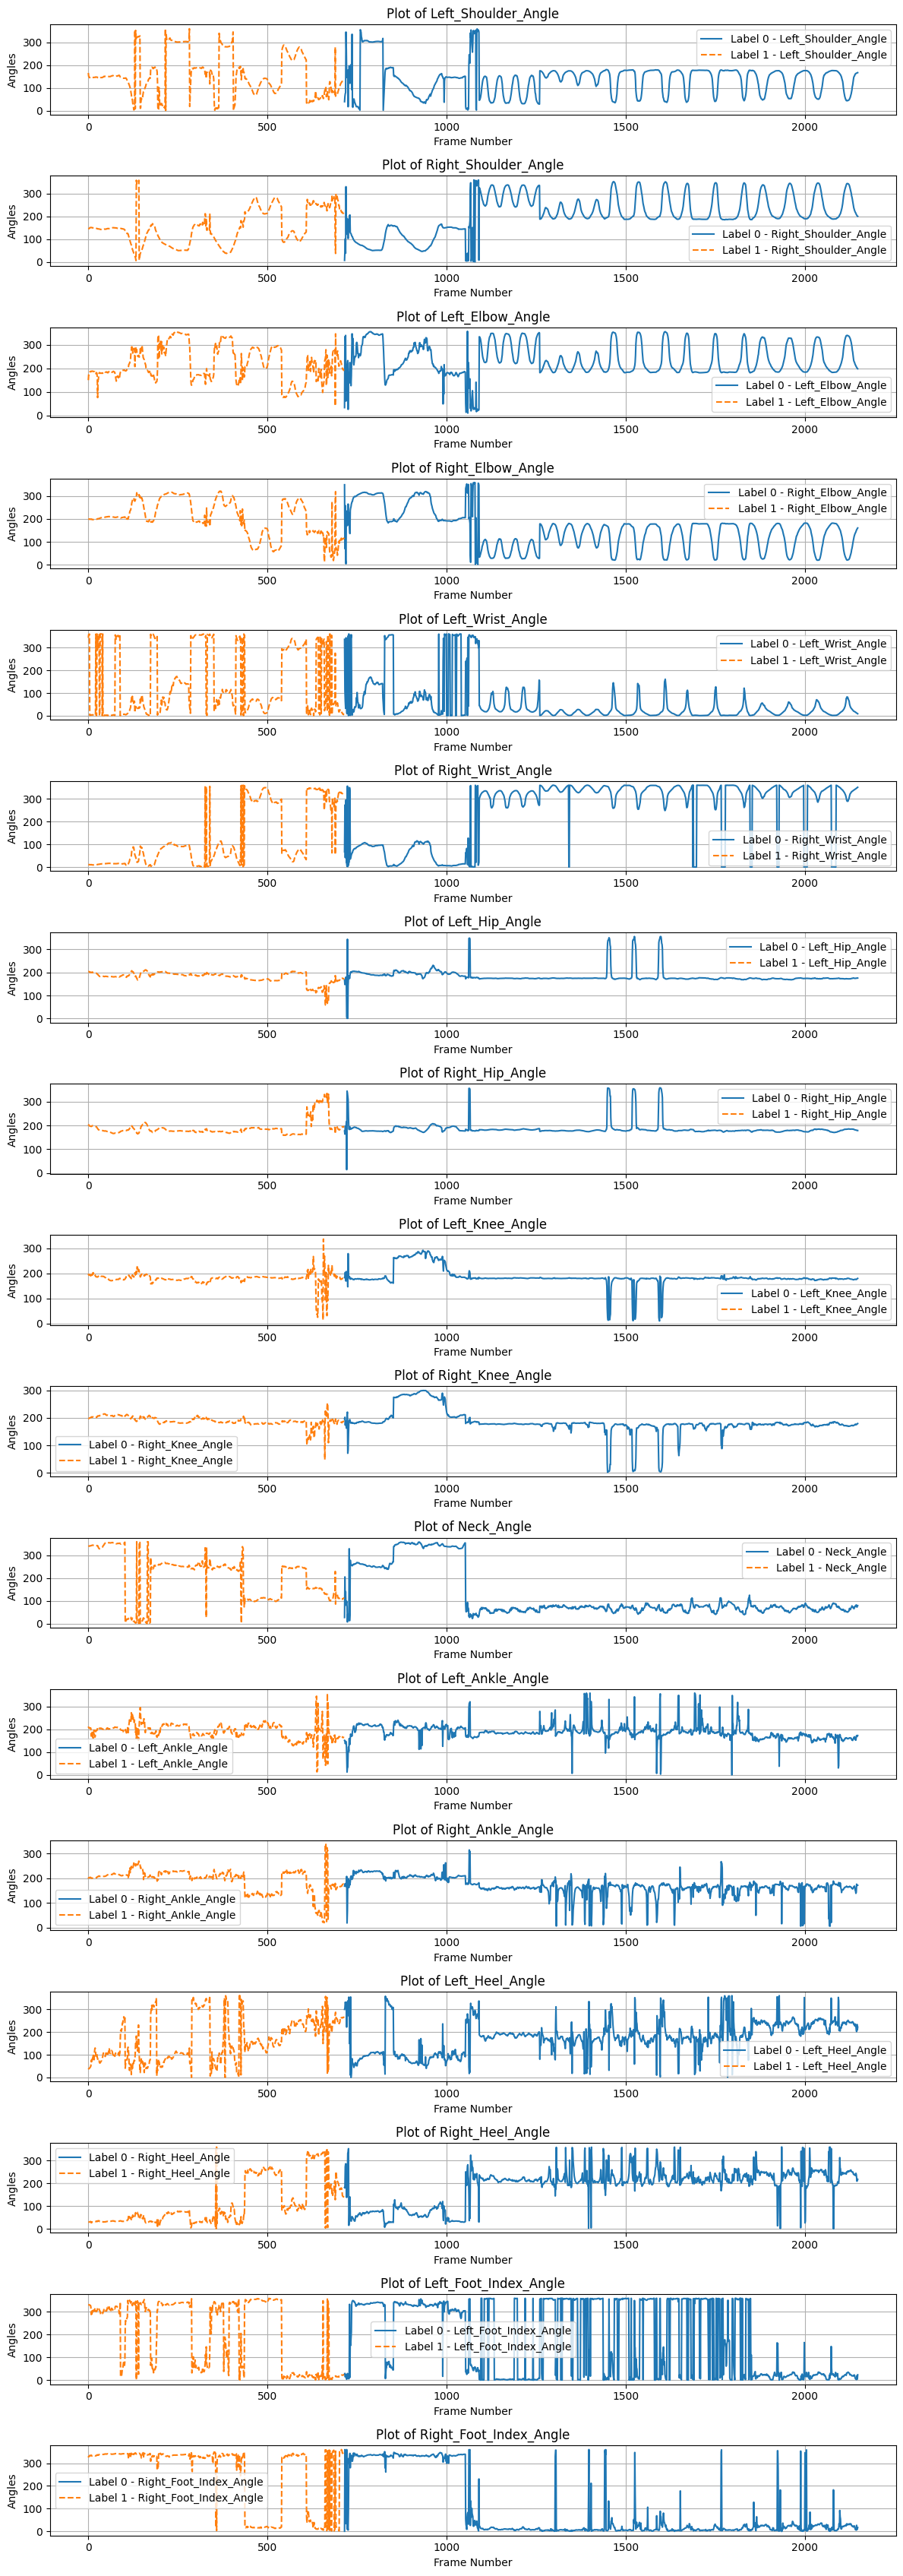

In [9]:
# Filter the dataset for label 0 and label 1
label_0_data = Data_With_Frame[Data_With_Frame['Label'] == 0]
label_1_data = Data_With_Frame[Data_With_Frame['Label'] == 1]

# Plot each angle in a separate subplot
num_angles = len(Data_With_Frame.columns) - 2  # Exclude 'frame number' and 'Label'
fig, axes = plt.subplots(nrows=num_angles, ncols=1, figsize=(12, 2 * num_angles))

for i, column in enumerate(Data_With_Frame.columns):
    if column not in ['frame number', 'Label']:
        ax = axes[i] if num_angles > 1 else axes  # Select the appropriate subplot
        ax.plot(label_0_data.index, label_0_data[column], label=f'Label 0 - {column}')
        ax.plot(label_1_data.index, label_1_data[column], label=f'Label 1 - {column}', linestyle='--')
        ax.set_xlabel('Frame Number')
        ax.set_ylabel('Angles')
        ax.set_title(f'Plot of {column}')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()